In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Učitavanje podataka

In [2]:
# Ucitaj skup podataka
df = pd.read_csv('Datasets/heart.csv')

# Prikazi dimenzije skupa
df.shape

(303, 14)

In [3]:
# Prikazi prvih nekoliko redaka
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Prikazi osnovne informacije o skupu podataka
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Prikaz numerckih varijaabli
numerical = [col for col in df.columns if df[col].dtypes != 'O']

numerical

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

In [6]:
df[numerical].isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Vizualizacija podataka

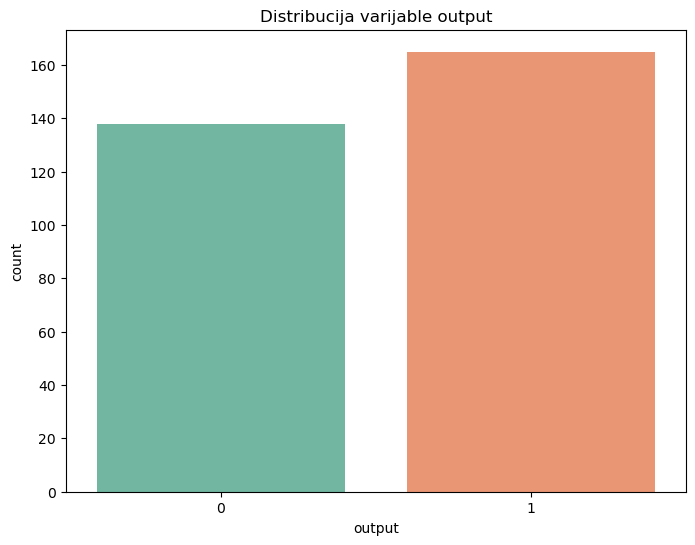

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='output', palette="Set2")
plt.title('Distribucija varijable output')
plt.show()

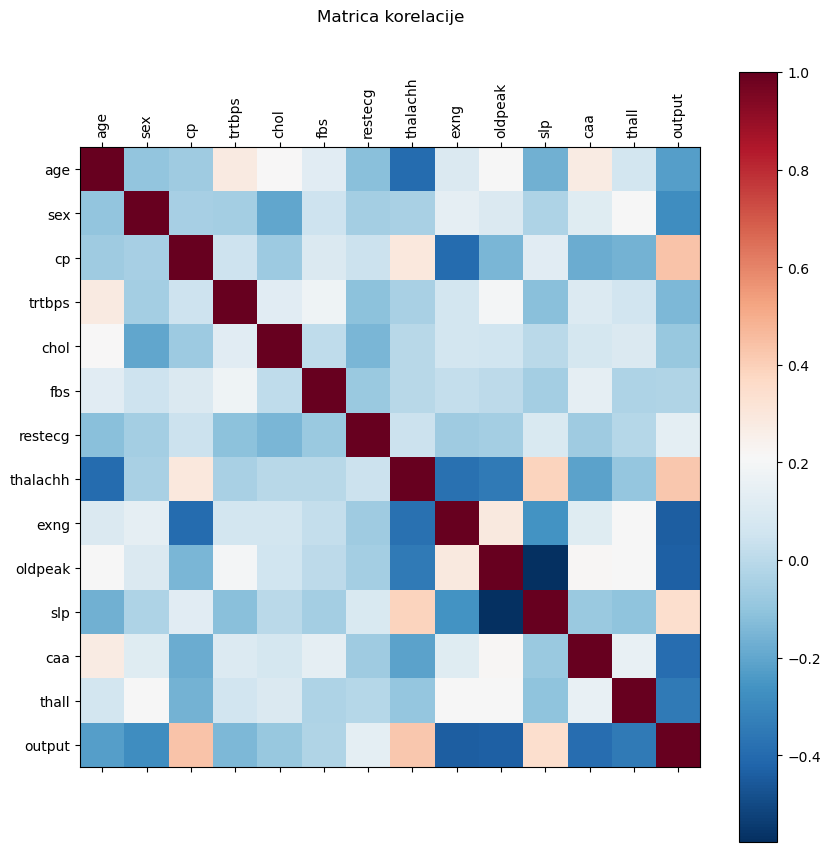

In [8]:
# Prikazi korelaciju izmedu atributa
corr = df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr, cmap='RdBu_r')

ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

plt.colorbar(cax)
plt.title("Matrica korelacije", pad=40)
plt.show()

## Preporuka optimalnog algoritma koritšenjem meta-učenja

#### Izračunavanje performansi i ARR mjere za skupove koji služe za izgradnju baze znanja meta-učenja

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from MtLModelAnalysis import *

preprocessed_datasets, target_variable_names = init_datasets()
algoritmi = algoritmi = {
            'LR': LogisticRegression(solver='lbfgs', max_iter=10000),
            'LDA': LinearDiscriminantAnalysis(),
            'CART': DecisionTreeClassifier(),
            "NB": GaussianNB(),
            "SVM": SVC(probability=True),
            "KNN": KNeighborsClassifier()
        }

alg_performances = []

for X, y in preprocessed_datasets:
    perforanseAlg = izracunaj_performanse_norm(X, y, algoritmi)
    alg_performances.append(perforanseAlg)

alg_arr_values = []
alg_arr_values2 = [] # Za informativni graf prikazujemo ARR sa alfa = 0 i alfa = 0.2
alg_arr_values3 = []

for dataset_alg_performance in alg_performances:
    alg_arr_value = izracunaj_ARR(dataset_alg_performance)
    alg_arr_values.append(alg_arr_value)

    alg_arr_values2.append(izracunaj_ARR(dataset_alg_performance , 0))
    alg_arr_values3.append(izracunaj_ARR(dataset_alg_performance, 0.2))

#### Grafički prikaz performansi algoritama nad skupovima podataka za bazu znanja

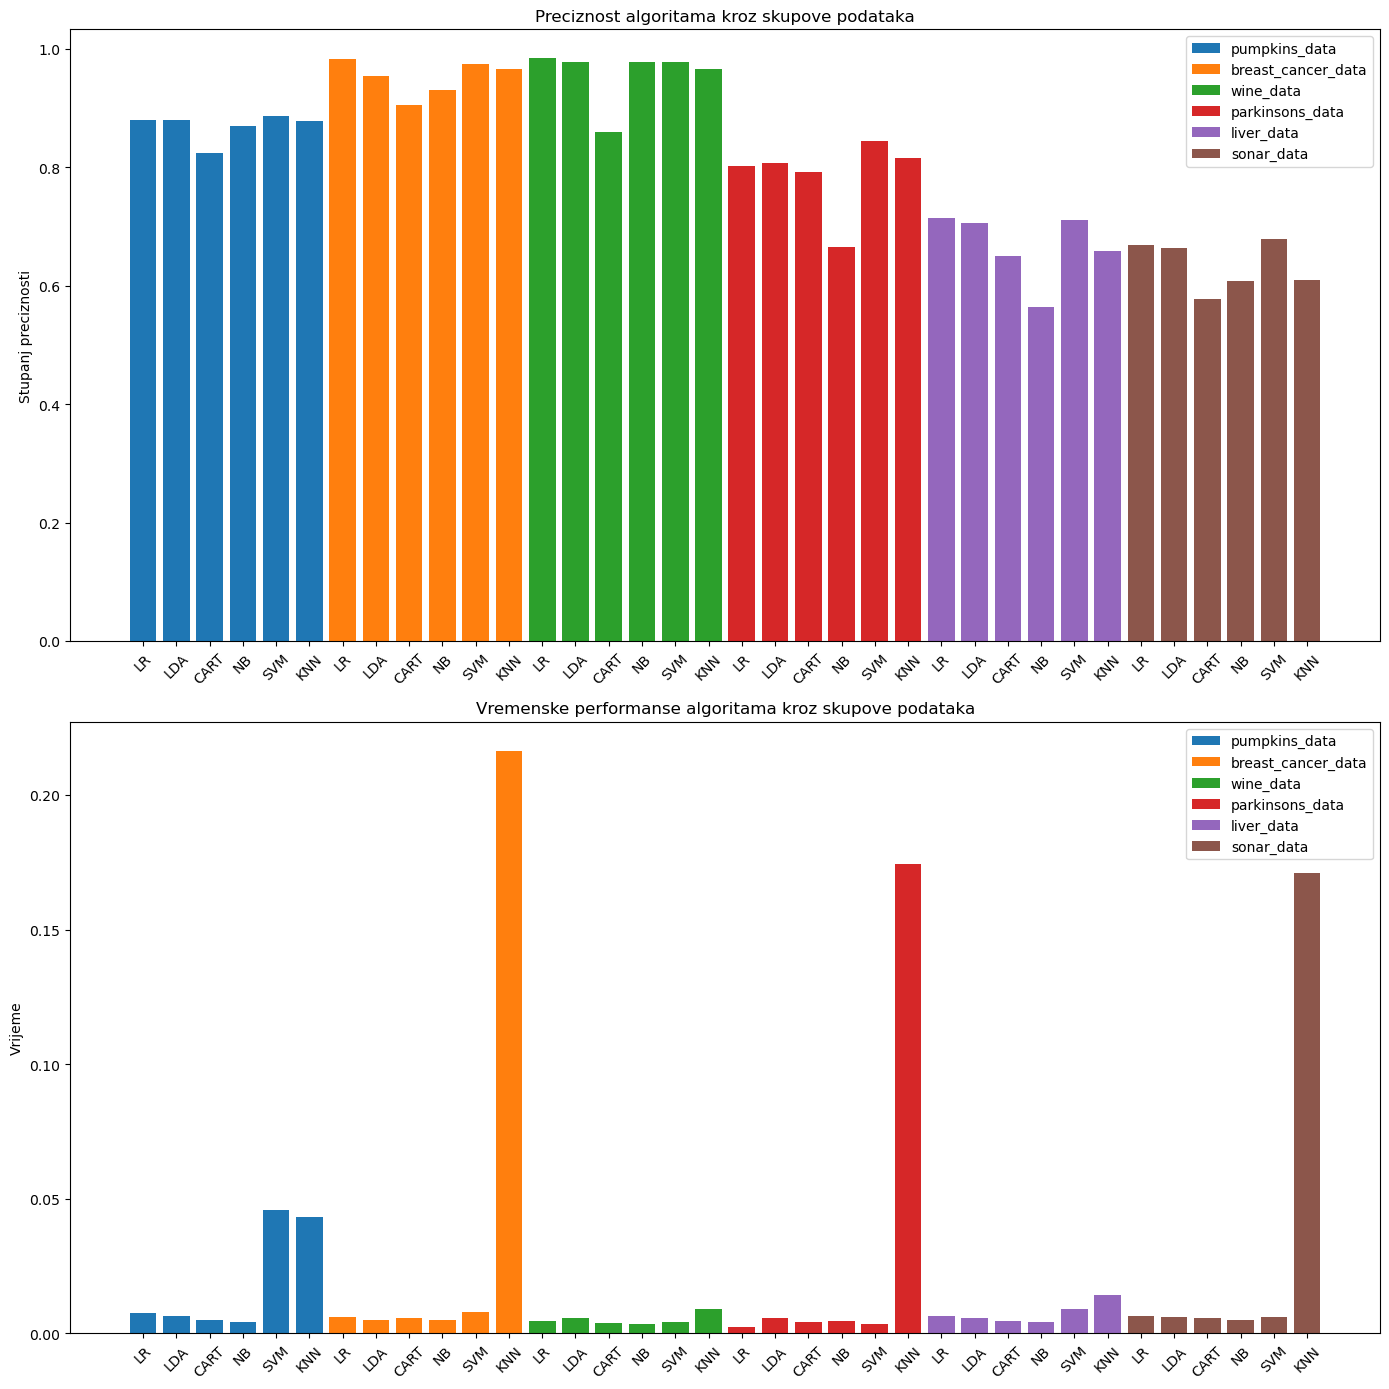

In [10]:
import matplotlib.pyplot as plt

dataset_names = list(target_variable_names.keys())

num_datasets = len(alg_performances)
algorithms = alg_performances[0]['Algoritam'].values

fig, ax = plt.subplots(2, 1, figsize=(14, 14))

bar_width = 0.1
spacing = 0.15

for index, (data, dataset_name) in enumerate(zip(alg_performances, dataset_names)):
    ax[0].bar(algorithms + "_" + str(index + 1), data['PreciznostAlgoritma'], label=dataset_name)
    ax[1].bar(algorithms + "_" + str(index + 1), data['VrijemeIzvrsavanja'], label=dataset_name)

ax[0].set_title('Preciznost algoritama kroz skupove podataka')
ax[0].set_ylabel('Stupanj preciznosti')
ax[0].set_xticks([(algo + "_" + str(i+1)) for i in range(num_datasets) for algo in algorithms])
ax[0].set_xticklabels([algo for i in range(num_datasets) for algo in algorithms], rotation=45)
ax[0].legend()

ax[1].set_title('Vremenske performanse algoritama kroz skupove podataka')
ax[1].set_ylabel('Vrijeme')
ax[1].set_xticks([(algo + "_" + str(i+1)) for i in range(num_datasets) for algo in algorithms])
ax[1].set_xticklabels([algo for i in range(num_datasets) for algo in algorithms], rotation=45)
ax[1].legend()

plt.tight_layout()
plt.show()

 #### Grafički prikaz vrijednosti ARR(Adjusted ratio of ratios) mjera algoritama za skupove podataka za bazu znanja

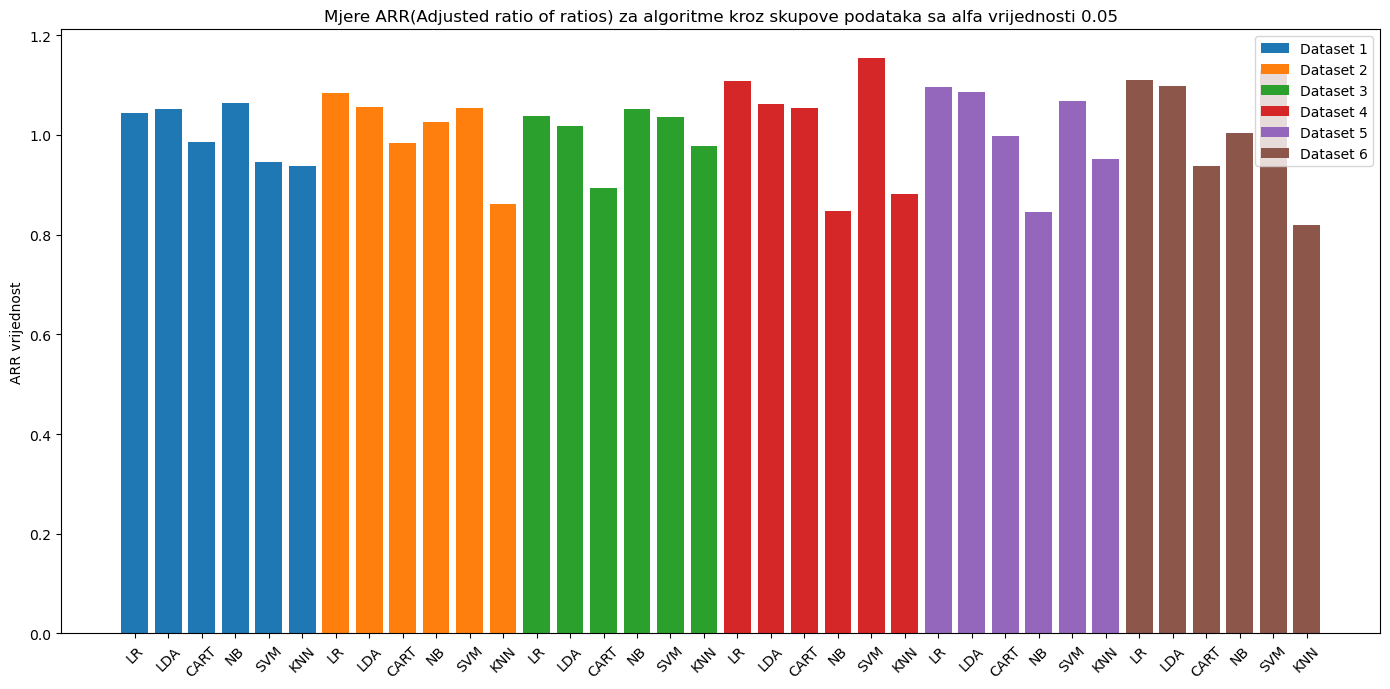

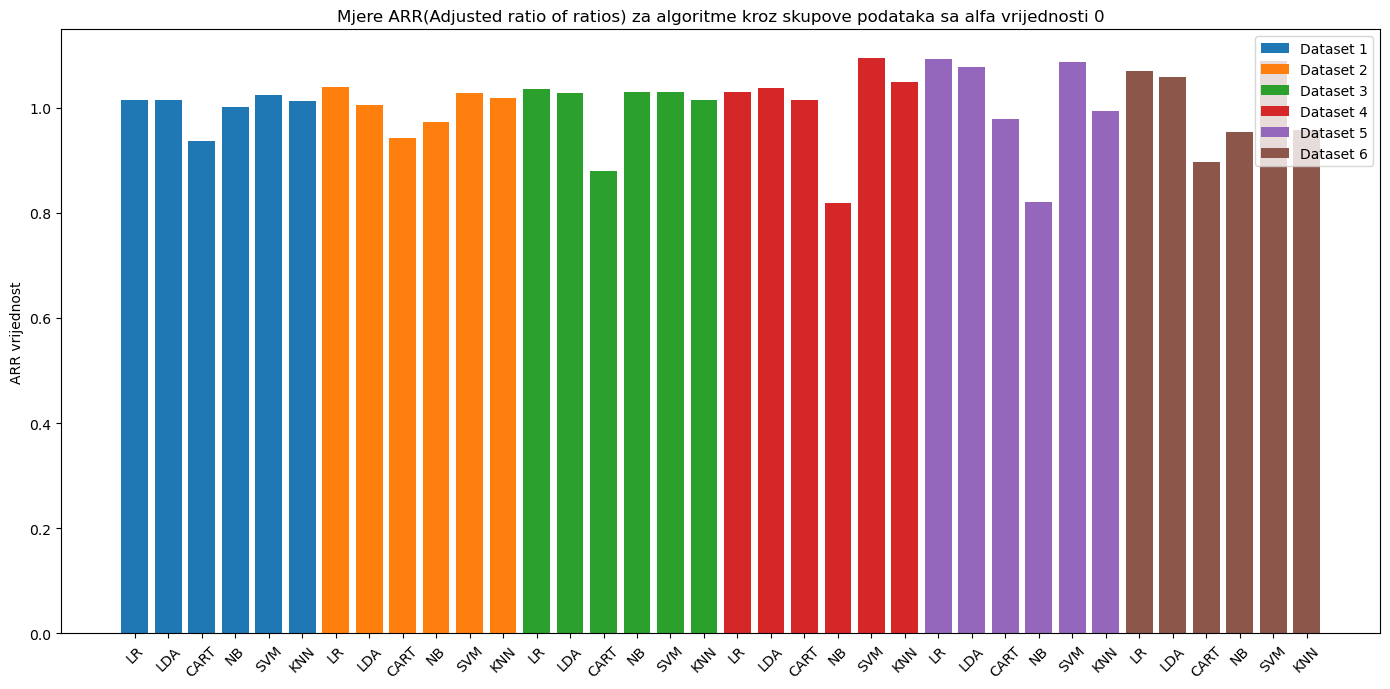

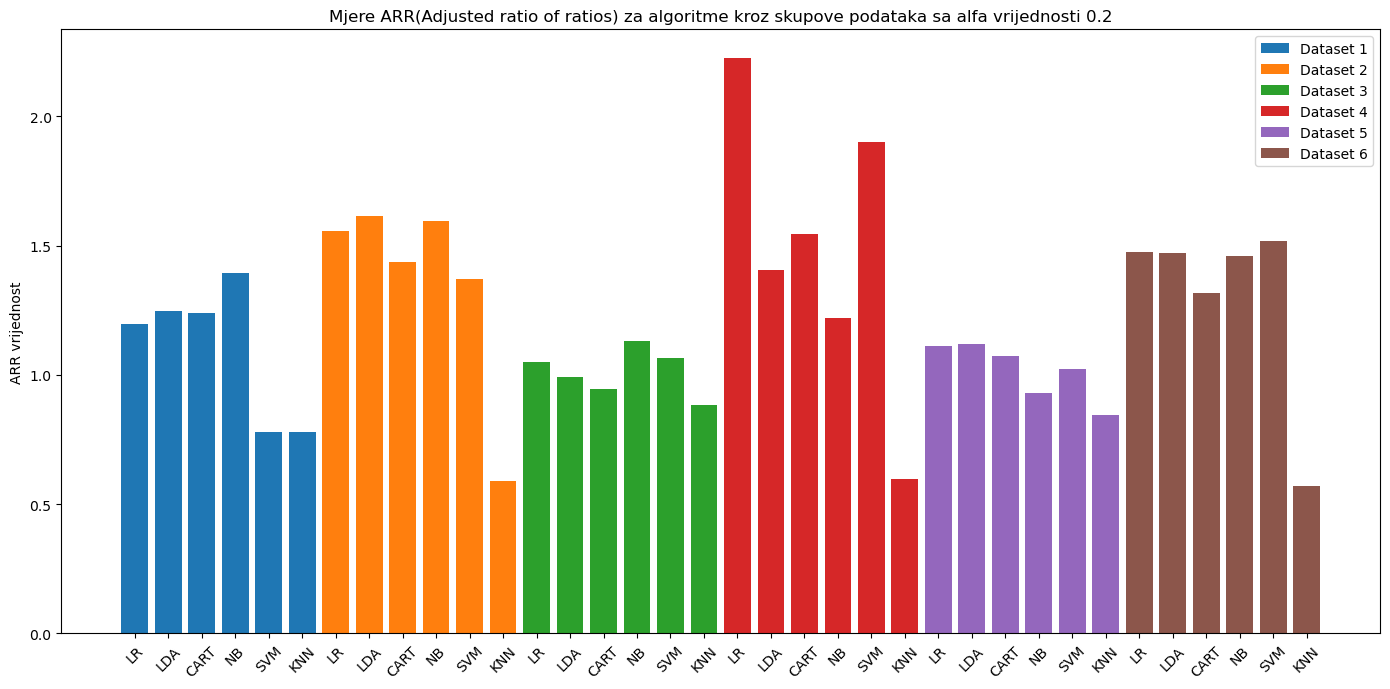

In [11]:
def plot_arr_values(arr_values_list, alfa_vrijednost):

    num_datasets = len(arr_values_list)
    algorithms = list(arr_values_list[0].keys())

    fig, ax = plt.subplots(figsize=(14, 7))

    for index, data in enumerate(arr_values_list):
        values = [data[algo] for algo in algorithms]
        ax.bar([algo + "_" + str(index + 1) for algo in algorithms], values, label='Dataset ' + str(index + 1))

    ax.set_title('Mjere ARR(Adjusted ratio of ratios) za algoritme kroz skupove podataka sa alfa vrijednosti ' + alfa_vrijednost)
    ax.set_ylabel('ARR vrijednost')
    
    ax.set_xticks([(algo + "_" + str(i+1)) for i in range(num_datasets) for algo in algorithms])
    ax.set_xticklabels([algo for i in range(num_datasets) for algo in algorithms], rotation=45)
    
    ax.legend()
    plt.tight_layout()
    plt.show()

plot_arr_values(alg_arr_values, "0.05")
plot_arr_values(alg_arr_values2, "0")
plot_arr_values(alg_arr_values3, "0.2")

## Računanje i prikazivanje vrijednosti meta-značajki

#### Izračunavanje meta-značajki skupova podataka meta-modela

In [12]:
import copy

# Postavi najbolji algoritam za svaki skup podataka
best_algorithms = []

for arr_values in alg_arr_values:
    best_algorithm = max(arr_values, key=arr_values.get)
    best_value = arr_values[best_algorithm]
    best_algorithms.append({best_algorithm: best_value})

mfe_categories = ["general", "statistical", "info-theory", "model-based", "landmarking"]

meta_knowledge_mfe = []

for (X, y), best_algo in zip(preprocessed_datasets, best_algorithms):
    dataset_metafeatures = []
    
    for category in mfe_categories:
        mfe = MFE(groups=category, summary=["median"])
        metafeatures = compute_metafeatures(X.to_numpy(), y, mfe)
        for key, value in metafeatures.items():
            if np.isnan(value):
                metafeatures[key] = 0
        dataset_metafeatures.append(metafeatures)
    
    dataset_metafeatures.append({"bestAlg": list(best_algo.keys())[0]})
    meta_knowledge_mfe.append(dataset_metafeatures)

c:\Users\Rajan\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Rajan\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\statistical.py:1267: RuntimeWarning: invalid value encountered in log
  np.log(np.linalg.det(S_i)) for S_i in sample_cov_matrices
c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\statistical.py:1272: RuntimeWarning: invalid value encountered in log
  * np.log(np.linalg.det(pooled_cov_mat))
c:\Users\Rajan\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was ren

In [13]:
# Pripremi vrijednosti meta-znacajki za model
def replace_dicts_with_values_exclude_last(data):
    replaced_data = []
    for sublist in data:
        replaced_sublist = [list(d.values()) if isinstance(d, dict) else d for d in sublist[:-1]]
        replaced_data.append(replaced_sublist)
    return replaced_data

meta_feature_model_dataset = replace_dicts_with_values_exclude_last(meta_knowledge_mfe)

#### Računanje meta-značajki trenutnog skupa podataka

In [14]:
df = pd.read_csv('Datasets/heart.csv')

heart_dataset_mfe = []

heart_y = df['output']
heart_X = df.drop(columns=['output'])

for category in mfe_categories:
    mfe = MFE(groups=category, summary=["median"])
    metafeatures = compute_metafeatures(heart_X.to_numpy(), heart_y.to_numpy(), mfe)
    #metafeatures["category"] = category
    for key, value in metafeatures.items():
        if np.isnan(value):
            metafeatures[key] = 0
    heart_dataset_mfe.append(metafeatures)

all_metafeature_values = meta_knowledge_mfe.copy()
all_metafeature_values.append(heart_dataset_mfe)

all_datasets = list(target_variable_names.keys())
all_datasets.append('heart_data')

all_metafeature_values

c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")
c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")
c:\Users\Rajan\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")


c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")
c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")


[[{'attr_to_inst': 0.0048,
   'cat_to_num': 0.0,
   'freq_class.median': 0.5,
   'inst_to_attr': 208.33333333333334,
   'nr_attr': 12,
   'nr_bin': 0,
   'nr_cat': 0,
   'nr_class': 2,
   'nr_inst': 2500,
   'nr_num': 12,
   'num_to_cat': 0},
  {'can_cor.median': 0.7691532244226179,
   'cor.median': 0.34466101978818076,
   'cov.median': 2.231076083055704,
   'eigenvalues.median': 0.3825150505614213,
   'g_mean.median': 113.30173284954277,
   'gravity': 6566.198757610276,
   'h_mean.median': 112.67933381304006,
   'iq_range.median': 14.943987499999988,
   'kurtosis.median': 0.02389538224832033,
   'lh_trace': 1.4485599344870363,
   'mad.median': 10.932025229999995,
   'max.median': 154.4812,
   'mean.median': 113.91831174000001,
   'median.median': 113.34365,
   'min.median': 76.66024999999999,
   'nr_cor_attr': 0.42424242424242425,
   'nr_disc': 1,
   'nr_norm': 0.0,
   'nr_outliers': 12,
   'p_trace': 0.59159668263971,
   'range.median': 77.82095,
   'roy_root': 1.4485599344870363,
  

#### Grafički prikaz meta-značajki od različitih skupova podataka koji čine bazu meta znanja

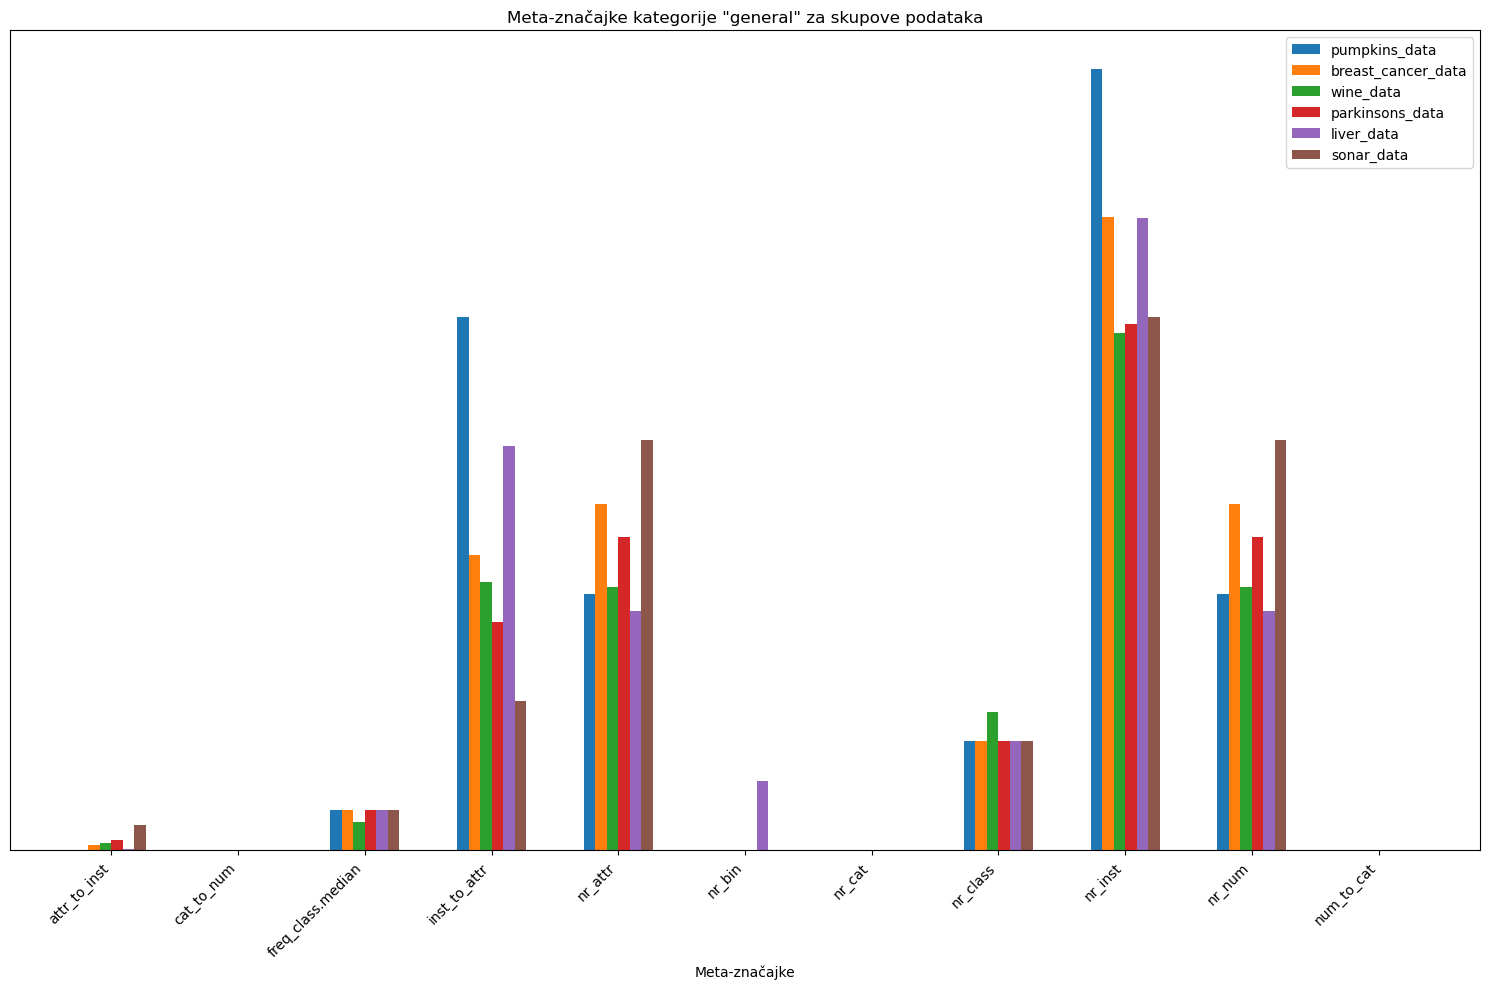

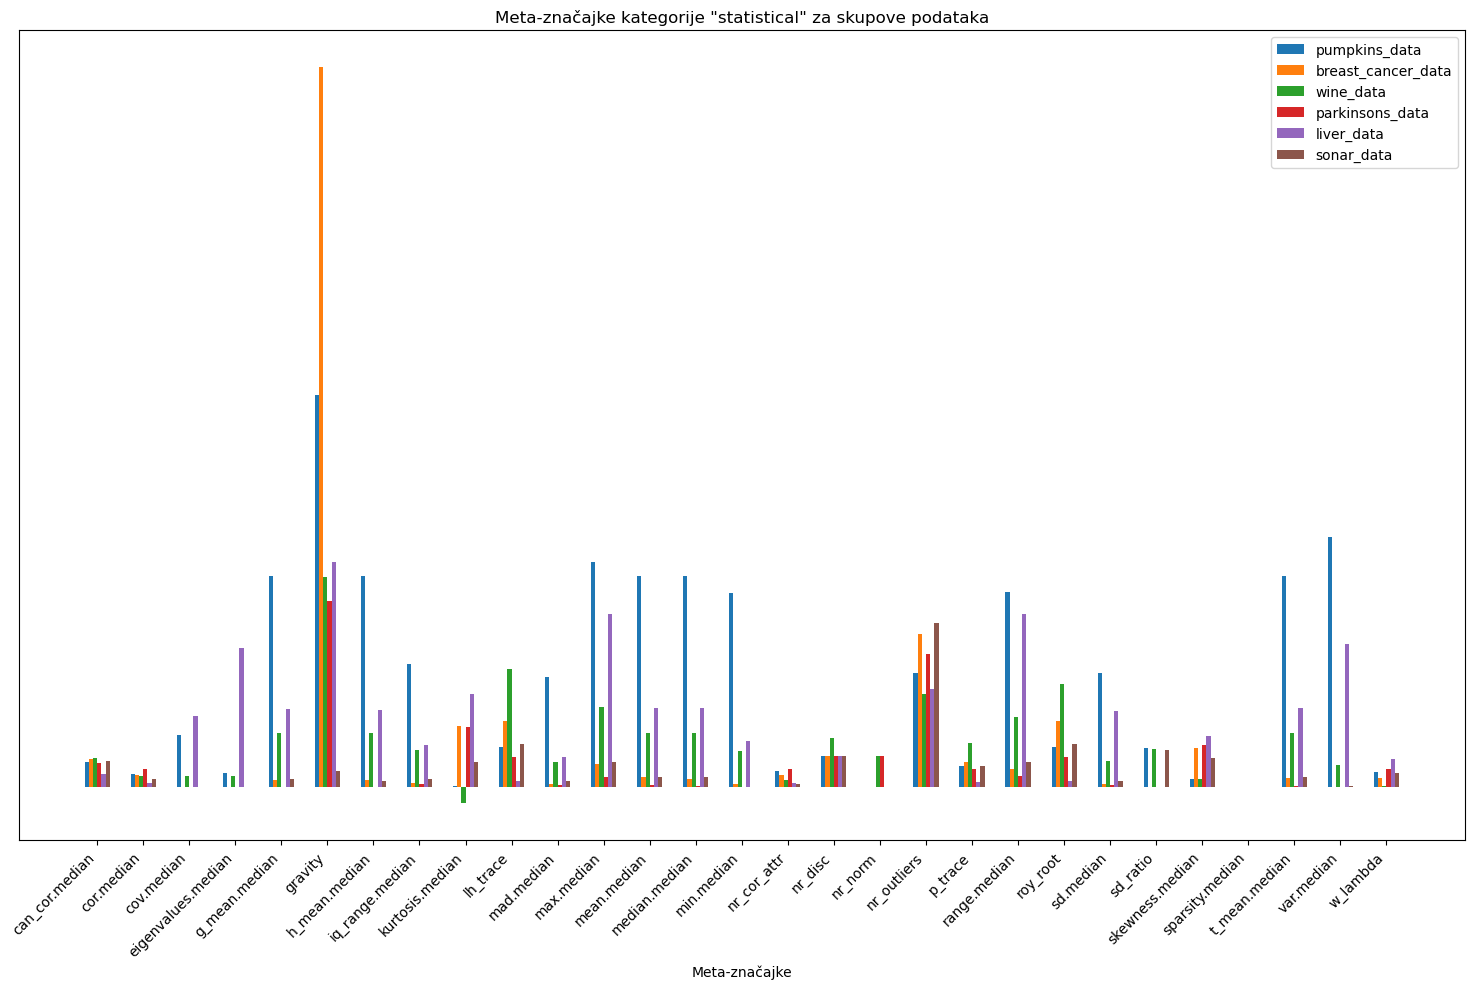

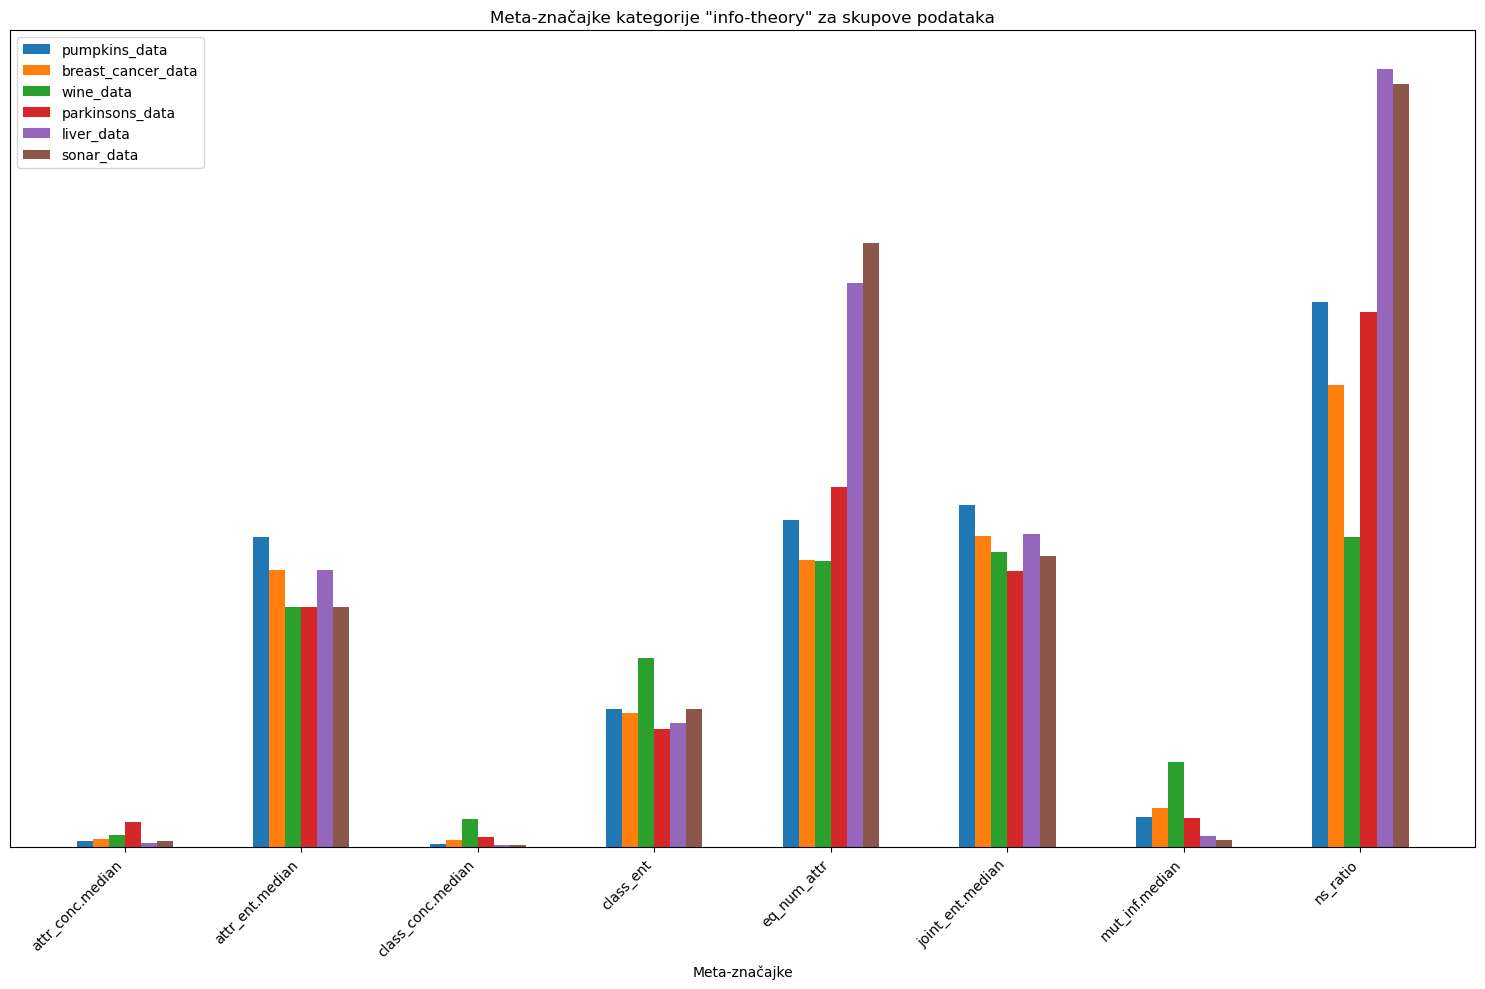

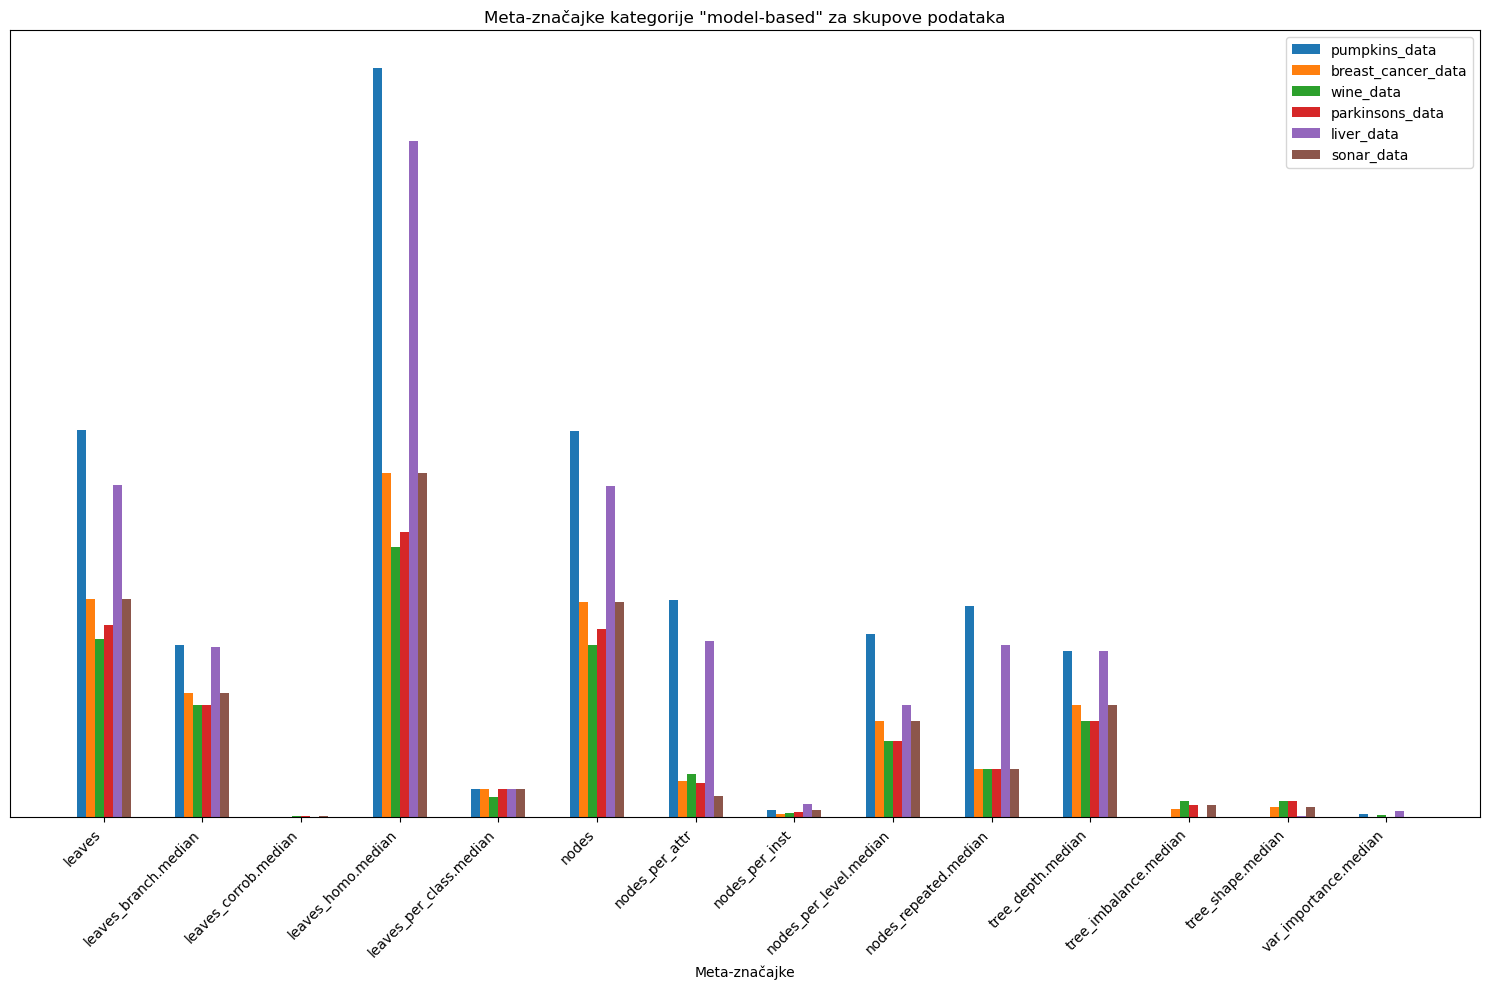

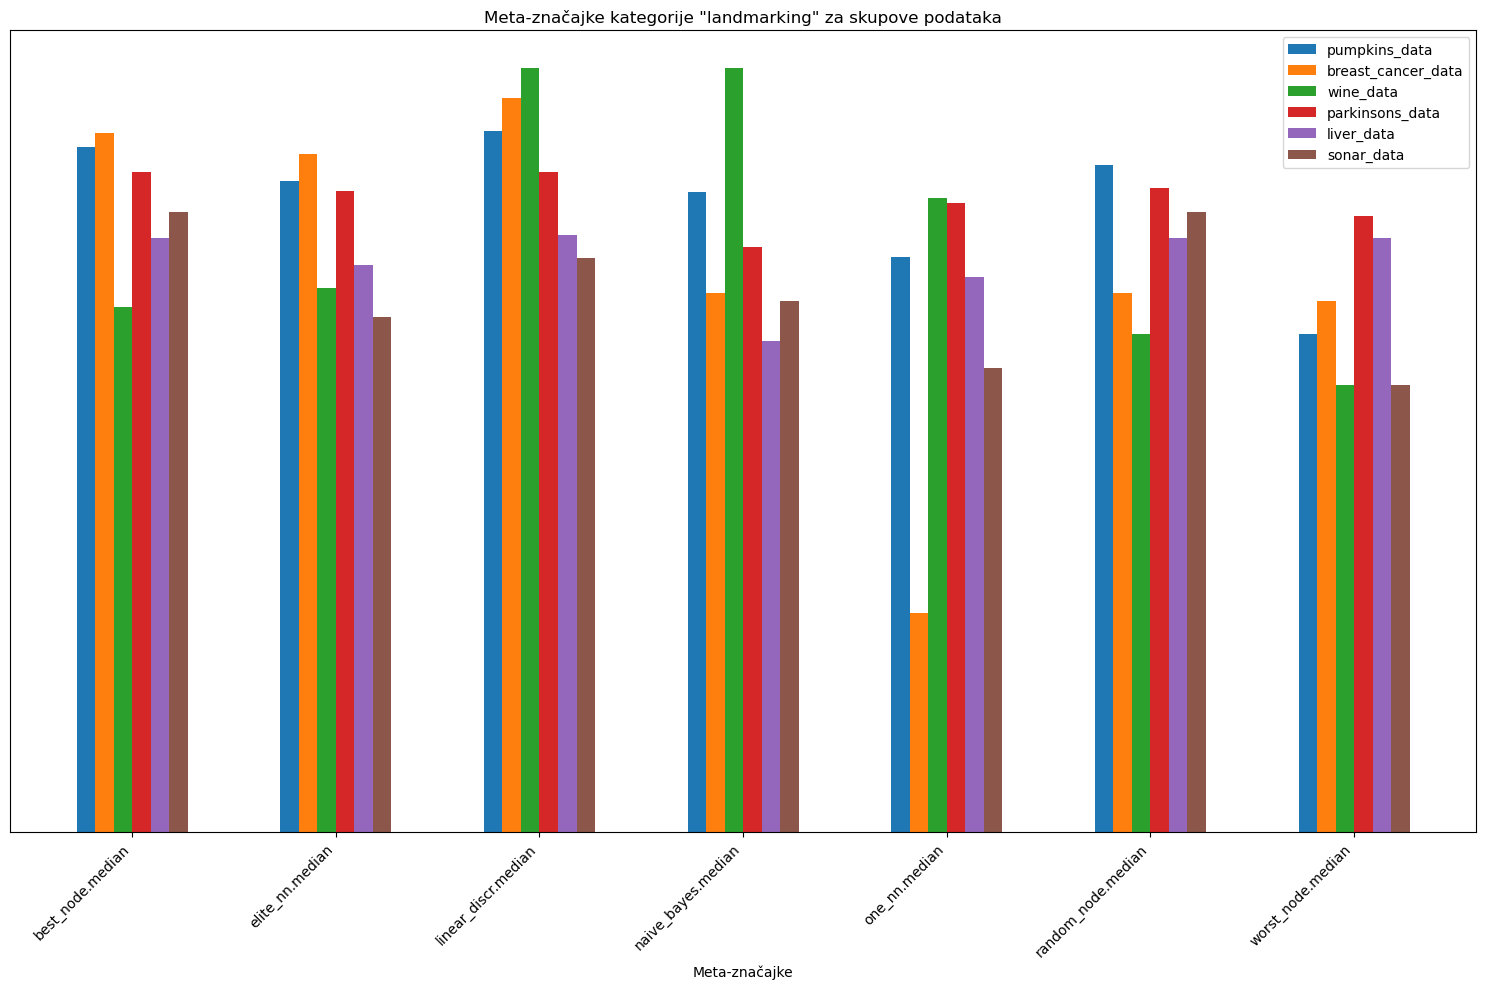

In [15]:
def log_transform(df):
    return np.log1p(df) 

for group_idx, category in enumerate(mfe_categories):

    current_group_metafeatures = [dataset_metafeatures[group_idx] for dataset_metafeatures in meta_knowledge_mfe]
    graph_data = pd.DataFrame(current_group_metafeatures)

    if 'bestAlg' in graph_data.columns:
        graph_data.drop('bestAlg', axis=1, inplace=True)

    graph_data = graph_data.transpose()
    graph_data.columns = target_variable_names.keys()
    graph_data_transformed = graph_data.apply(log_transform)

    bar_width = 0.1
    spacing = 0.1
    index = [i + i*spacing for i in range(len(graph_data_transformed.index))]

    fig, ax = plt.subplots(figsize=(15, 10))

    for i, dataset in enumerate(graph_data_transformed.columns):
        ax.bar([x + i*bar_width for x in index], graph_data_transformed[dataset], width=bar_width, label=dataset)

    ax.set_xlabel('Meta-značajke')
    ax.set_title(f'Meta-značajke kategorije "{category}" za skupove podataka')
    ax.set_xticks([x + (bar_width*(len(graph_data_transformed.columns)-1)/2) for x in index])
    ax.set_xticklabels(graph_data_transformed.index, rotation=45, ha='right')  # Angling the meta-feature names
    ax.legend()

    ax.set_yticks([])
    ax.set_ylabel('')

    plt.tight_layout()
    plt.show()

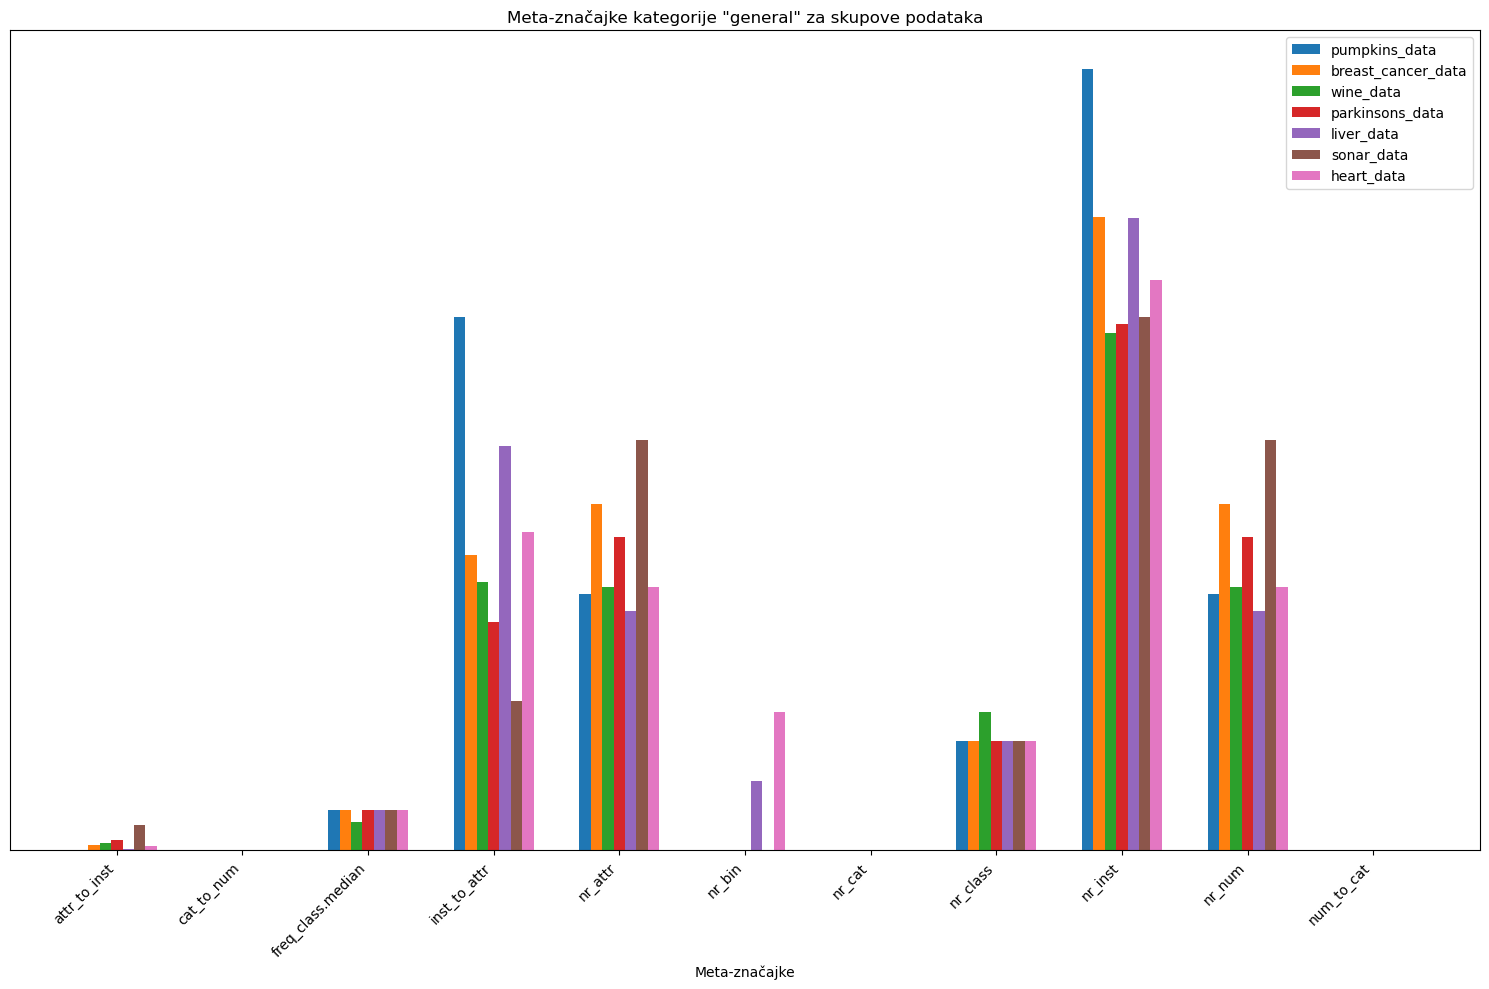

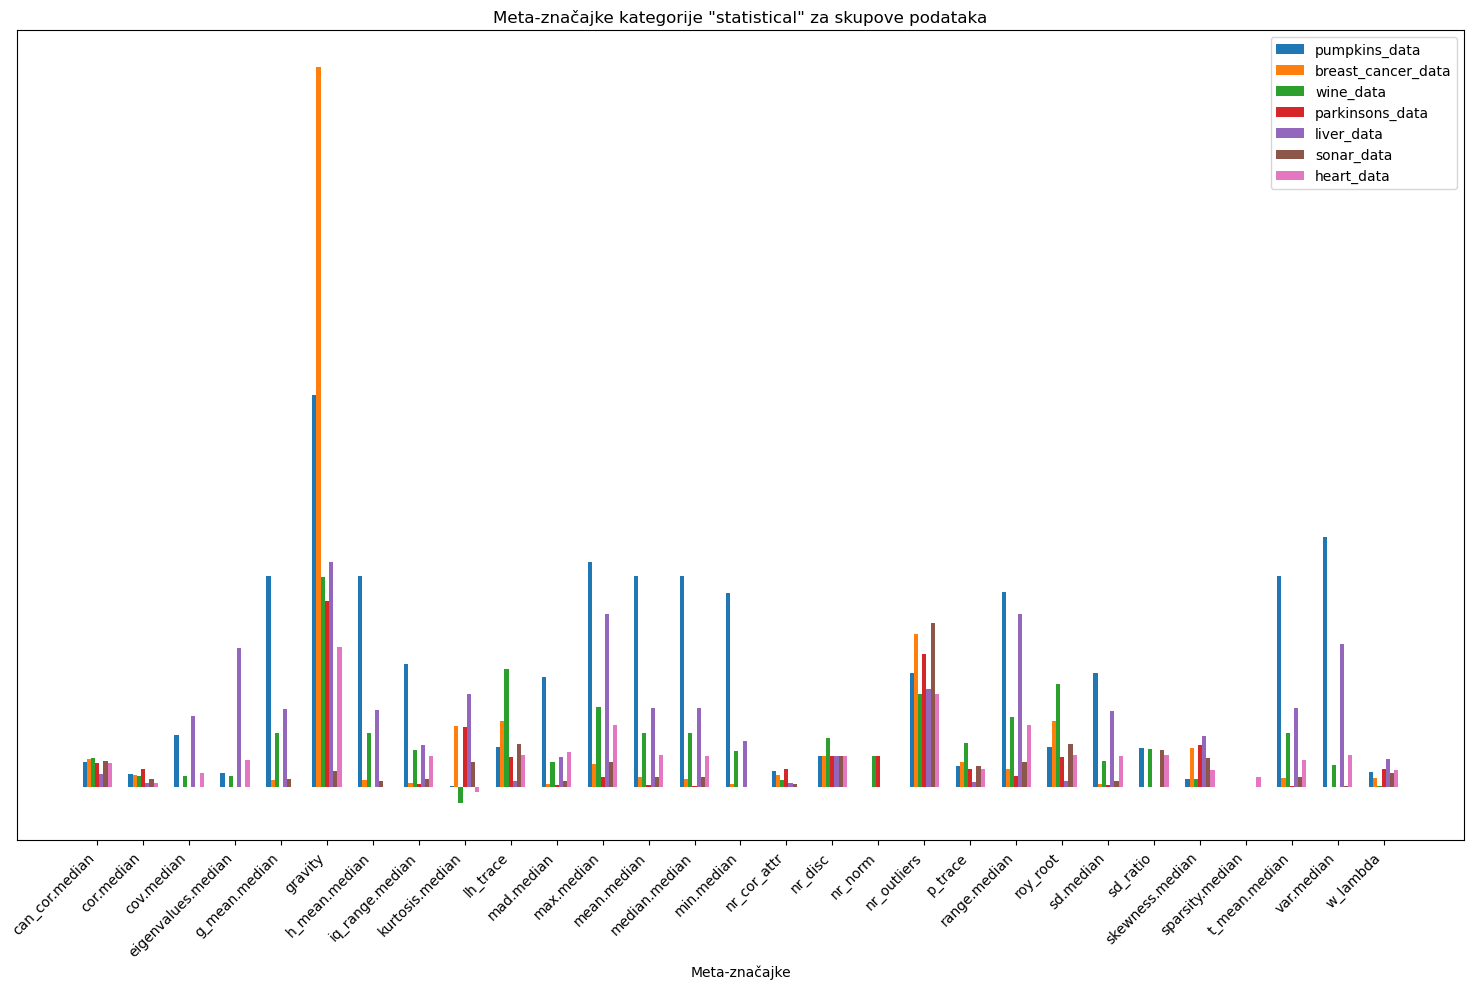

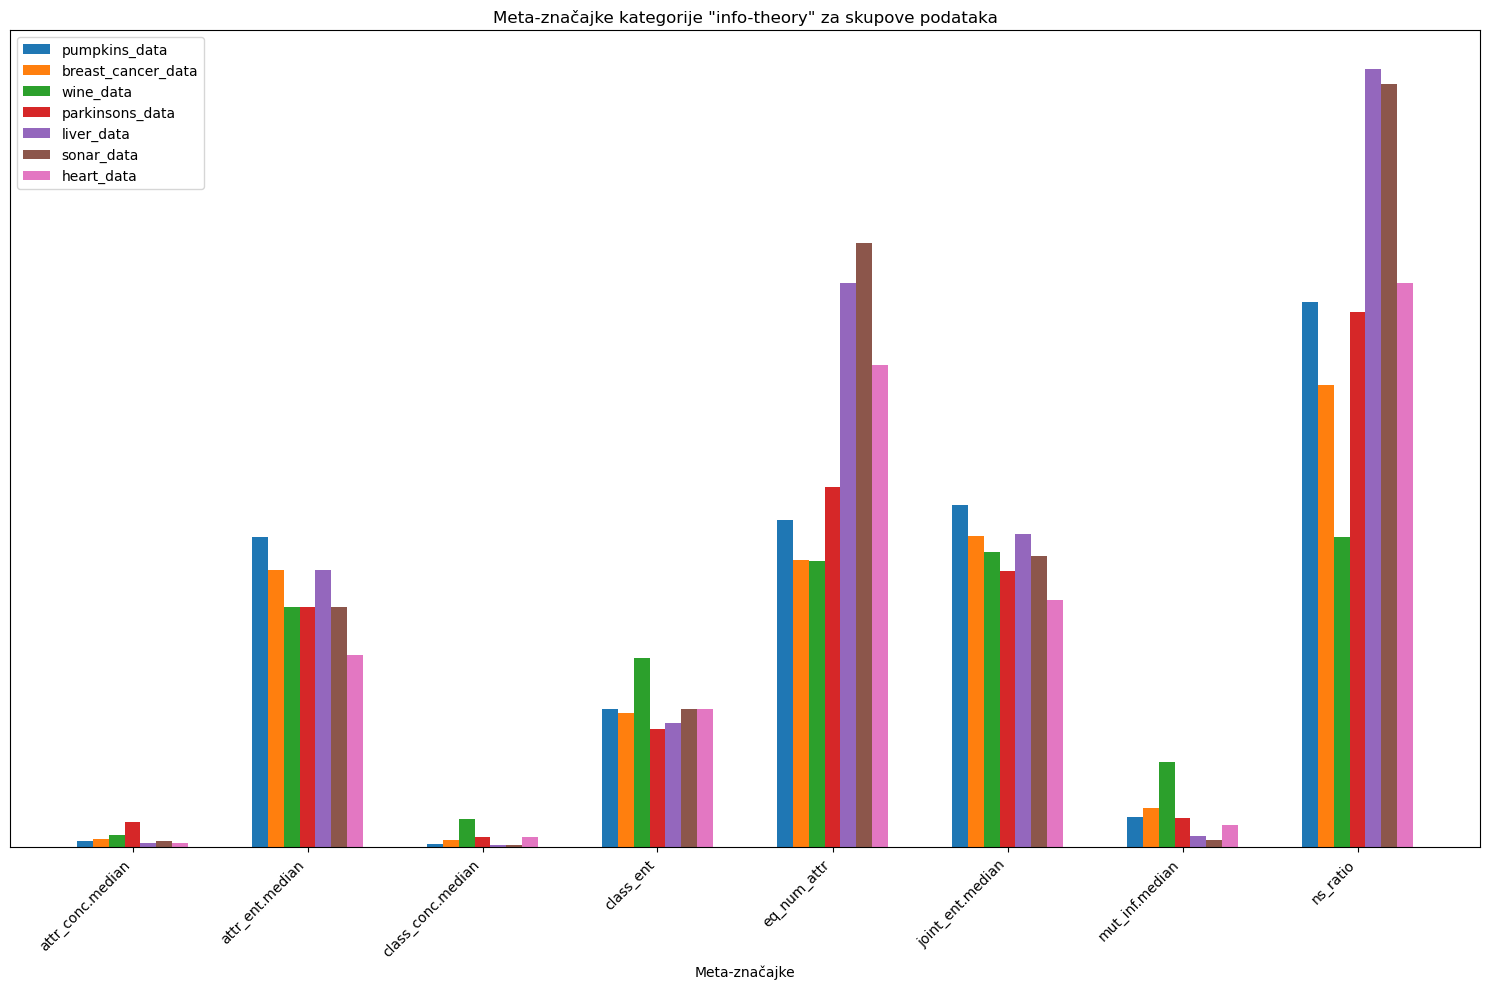

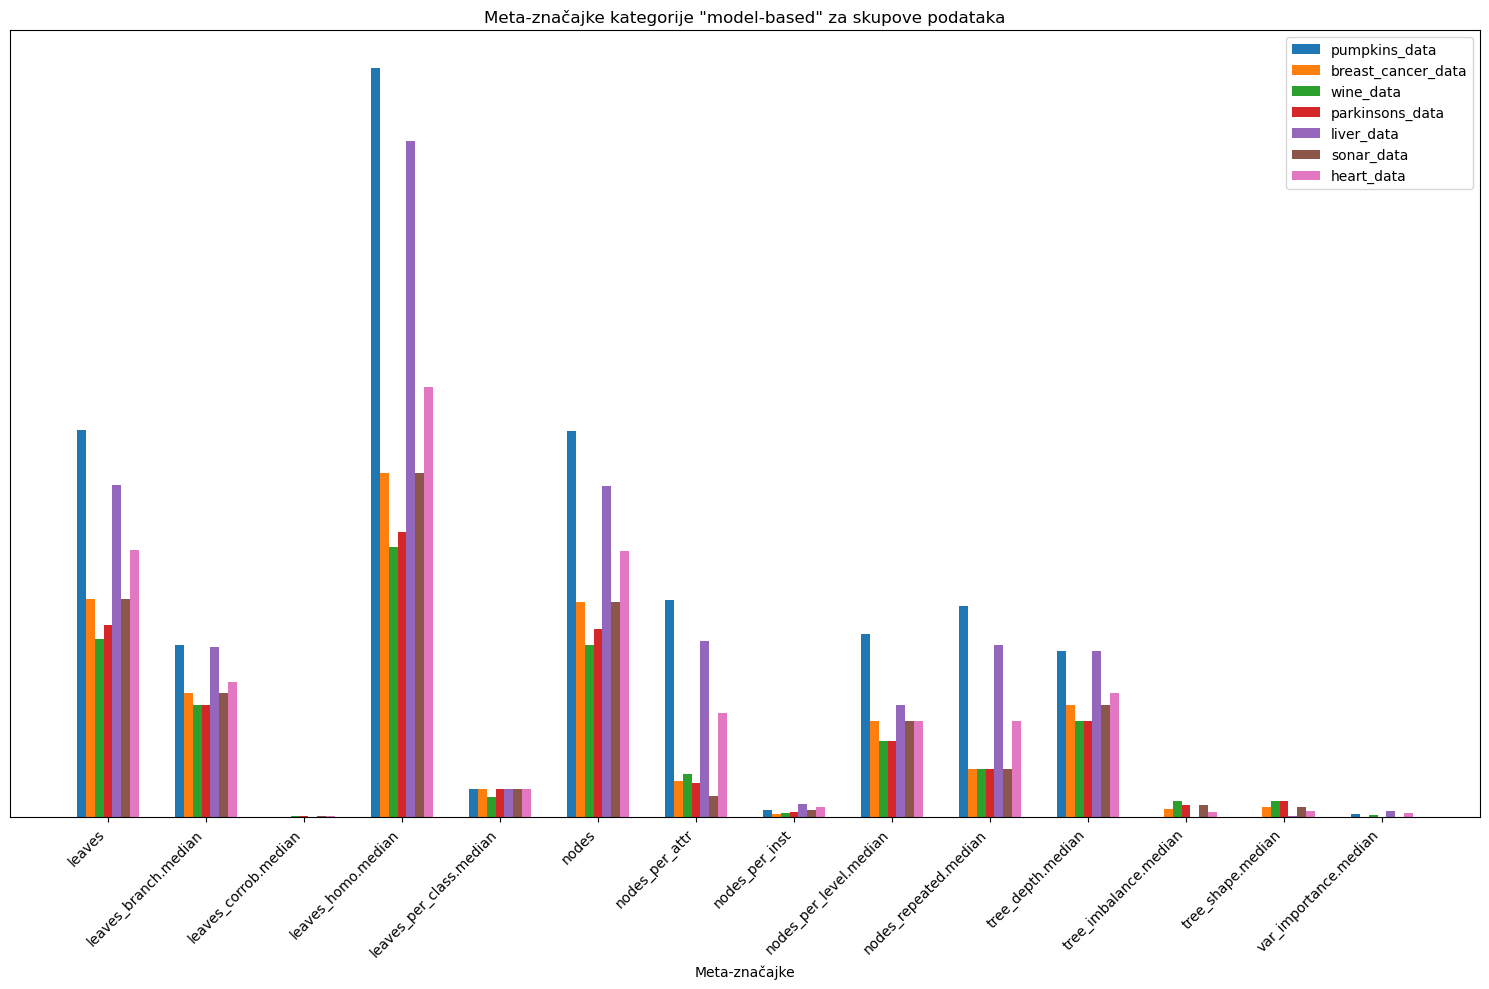

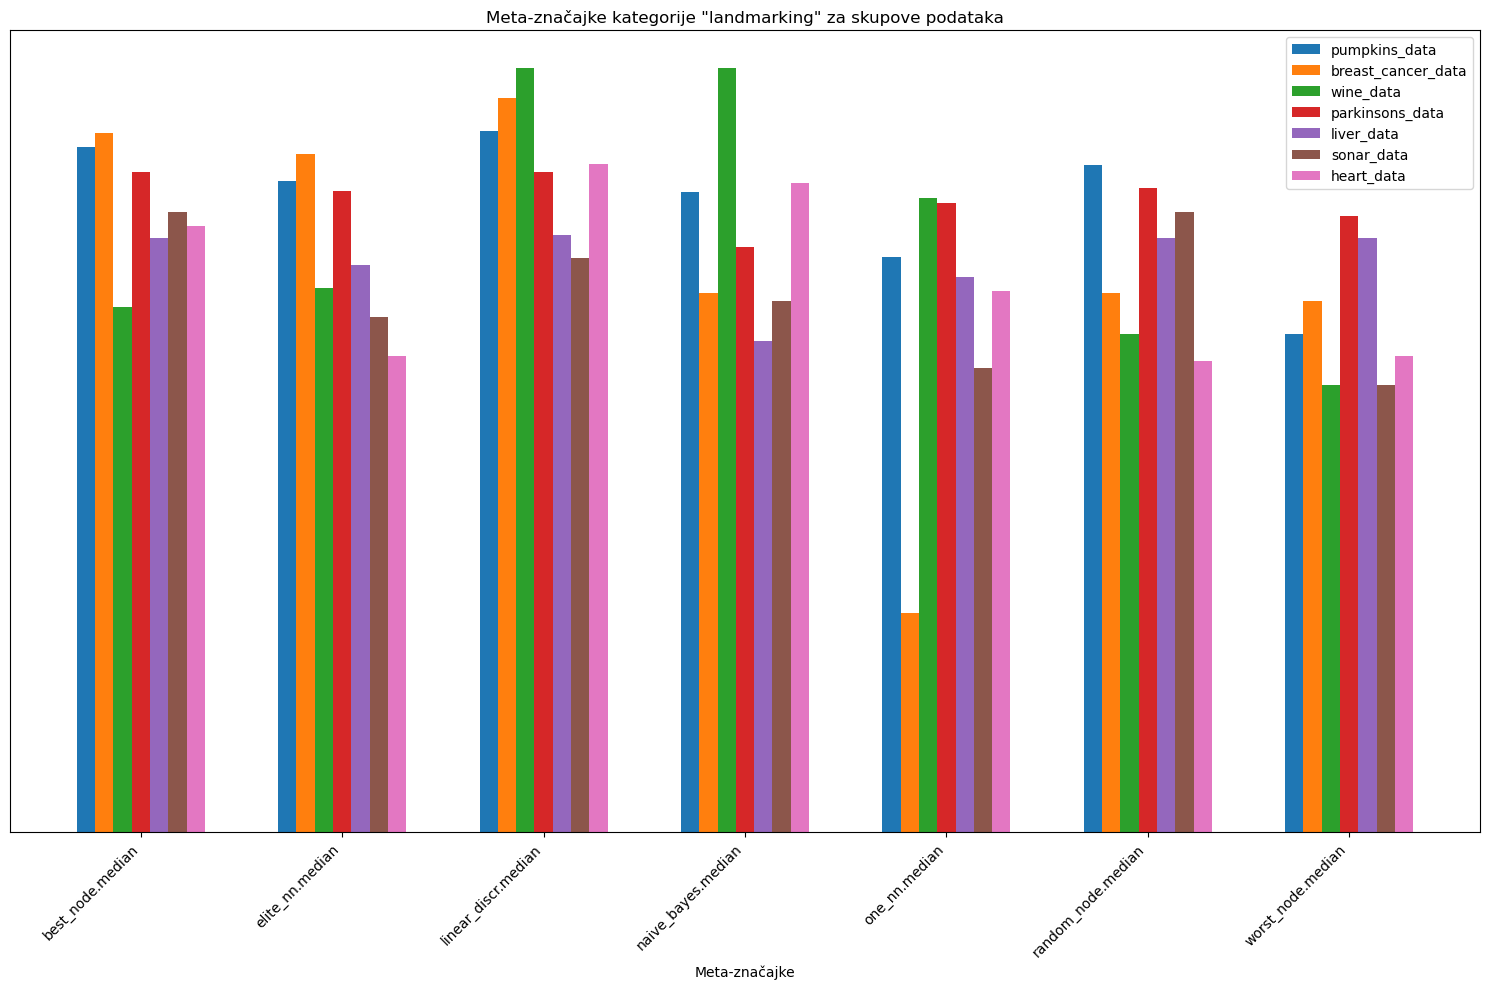

In [16]:
def log_transform(df):
    return np.log1p(df)

for group_idx, category in enumerate(mfe_categories):

    current_group_metafeatures = [dataset_metafeatures[group_idx] for dataset_metafeatures in all_metafeature_values]
    graph_data = pd.DataFrame(current_group_metafeatures)

    if 'bestAlg' in graph_data.columns:
        graph_data.drop('bestAlg', axis=1, inplace=True)

    graph_data = graph_data.transpose()
    graph_data.columns = all_datasets
    graph_data_transformed = graph_data.apply(log_transform)

    bar_width = 0.1
    spacing = 0.1
    index = [i + i*spacing for i in range(len(graph_data_transformed.index))]

    fig, ax = plt.subplots(figsize=(15, 10))

    for i, dataset in enumerate(graph_data_transformed.columns):
        ax.bar([x + i*bar_width for x in index], graph_data_transformed[dataset], width=bar_width, label=dataset)

    ax.set_xlabel('Meta-značajke')
    ax.set_title(f'Meta-značajke kategorije "{category}" za skupove podataka')
    ax.set_xticks([x + (bar_width*(len(graph_data_transformed.columns)-1)/2) for x in index])
    ax.set_xticklabels(graph_data_transformed.index, rotation=45, ha='right')  # Angling the meta-feature names
    ax.legend()

    ax.set_yticks([])
    ax.set_ylabel('')

    plt.tight_layout()
    plt.show()

#### Učenje meta-učenika te izračunavanje preporučenih algoritama

In [17]:
#New code
scaler = StandardScaler()
algorithm_names = [meta[-1]["bestAlg"] for meta in meta_knowledge_mfe]
label_encoder = LabelEncoder()
encoded_algo_names = label_encoder.fit_transform(algorithm_names)

classifiers = {}

for i, category in enumerate(mfe_categories):

    X_meta = [meta[i] for meta in meta_feature_model_dataset]

    y_meta = encoded_algo_names
    meta_df = pd.DataFrame(X_meta)

    max_length = max(len(sublist) for sublist in X_meta)
    padded_list = [sublist + [0] * (max_length - len(sublist)) for sublist in X_meta]
    X_meta_np = np.array(padded_list)

    X_meta_scaled = scaler.fit_transform(np.array(X_meta_np))

    rf = RandomForestClassifier(n_estimators=100, random_state=42)

    rf.fit(X_meta_scaled ,y_meta)
    
    classifiers[category] = rf

In [18]:
predictions = {}
i = 0
for category in mfe_categories:
    current_group_mfe = heart_dataset_mfe[i]

    valuesNp = np.array(list(current_group_mfe.values())).reshape(1, -1)
    rf = classifiers[category]
    predicted_indices = rf.predict(valuesNp)
    predicted_algorithm_name = label_encoder.inverse_transform(predicted_indices)[0]
    predictions[category] = predicted_algorithm_name
    i += 1

print("---------------------------------------------------------------------------")
print("Preporučeni algoritam za ovaj skup podataka je: ", predictions)
print("---------------------------------------------------------------------------")   

---------------------------------------------------------------------------
Preporučeni algoritam za ovaj skup podataka je:  {'general': 'LR', 'statistical': 'NB', 'info-theory': 'NB', 'model-based': 'NB', 'landmarking': 'NB'}
---------------------------------------------------------------------------


## Prikaz meta-značajki skupa podataka srčanih bolesnika

#### Općenite meta-značajke

In [19]:
X = df.drop(columns=['output'])
y = df['output']

mfe = MFE(groups=["general"], summary="mean")
mfe.fit(X.to_numpy(), y.to_numpy())
ft = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

attr_to_inst                                                   0.0429042904290429
cat_to_num                                                                    0.0
freq_class.mean                                                               0.5
inst_to_attr                                                   23.307692307692307
nr_attr                                                                        13
nr_bin                                                                          3
nr_cat                                                                          0
nr_class                                                                        2
nr_inst                                                                       303
nr_num                                                                         13
num_to_cat                                                                    nan


c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")


#### Statističke meta-značajke

In [20]:
mfe = MFE(groups=["statistical"], summary="mean")
mfe.fit(X.to_numpy(), y.to_numpy())
ft = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

can_cor.mean                                                   0.7194094553351981
cor.mean                                                      0.13519456880605527
cov.mean                                                        5.790741086334817
eigenvalues.mean                                               277.39992400666466
g_mean.mean                                                    44.075838453213386
gravity                                                        22.345886139364566
h_mean.mean                                                     43.38755433564541
iq_range.mean                                                                10.7
kurtosis.mean                                                 0.22206813182938767
lh_trace                                                       1.0727535003901272
mad.mean                                                        7.618283076923078
max.mean                                                        82.01538461538462
mean.mean       

c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")
c:\Users\Rajan\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Teorijsko informacijske meta-značajke

In [21]:
mfe = MFE(groups=["info-theory"], summary="mean")
mfe.fit(X.to_numpy(), y.to_numpy())
ft = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")


attr_conc.mean                                                0.03066701419258139
attr_ent.mean                                                  1.6502472489585975
class_conc.mean                                               0.08238336569252837
class_ent                                                      0.9942646092619051
eq_num_attr                                                      10.1103276541586
joint_ent.mean                                                 2.5461703758005005
mut_inf.mean                                                  0.09834148242000271
ns_ratio                                                        15.78078475480594


#### Meta-značajke temeljene na modelima

In [22]:
mfe = MFE(groups=["model-based"], summary="mean")
mfe.fit(X.to_numpy(), y.to_numpy())
ft = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

leaves                                                                         46
leaves_branch.mean                                              6.173913043478261
leaves_corrob.mean                                           0.021739130434782608
leaves_homo.mean                                                844.7238095238095
leaves_per_class.mean                                                         0.5
nodes                                                                          45
nodes_per_attr                                                 3.4615384615384617
nodes_per_inst                                                 0.1485148514851485
nodes_per_level.mean                                                          4.5
nodes_repeated.mean                                                          3.75
tree_depth.mean                                                 5.252747252747253
tree_imbalance.mean                                           0.11632116691586537
tree_shape.mean 

c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")


#### Landmarking meta-značajke

In [23]:
mfe = MFE(groups=["landmarking"], summary="mean")
mfe.fit(X.to_numpy(), y.to_numpy())
ft = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft[0], ft[1])))

c:\Users\Rajan\Anaconda3\Lib\site-packages\pymfe\_internal.py:1568: UserWarning: It is not possible make equal discretization
  warnings.warn("It is not possible make equal discretization")


best_node.mean                                                 0.7221505376344085
elite_nn.mean                                                  0.5445161290322581
linear_discr.mean                                              0.8216129032258065
naive_bayes.mean                                               0.8050537634408602
one_nn.mean                                                     0.594516129032258
random_node.mean                                               0.5149462365591397
worst_node.mean                                                0.5182795698924731
